# Exploratory Data Analysis of SAML-D Dataset  
This notebook analyzes the Synthetic Anti-Money Laundering Dataset (SAML-D).  
We explore transaction features, engineer suspiciousness indicators (e.g., cross-border transfers, currency mismatches), and visualize patterns that may suggest money laundering behavior.  



In [ ]:
# Step 1: Upload kaggle.json (API key you downloaded from Kaggle)
from google.colab import files
files.upload()


In [ ]:
# Step 2: Put kaggle.json in the right folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
# Step 3: Download the dataset from Kaggle
!kaggle datasets download berkanoztas/synthetic-transaction-monitoring-dataset-aml

# Step 4: Unzip the dataset
import zipfile

with zipfile.ZipFile("synthetic-transaction-monitoring-dataset-aml.zip", "r") as zip_ref:
    zip_ref.extractall("data")


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


FileNotFoundError: [Errno 2] No such file or directory: 'synthetic-transaction-monitoring-dataset-aml.zip'

In [6]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [7]:
DATASET_DIR = "/content/drive/MyDrive/kaggle_datasets/SAML-D"


In [4]:
import zipfile

# unzip into Drive folder
with zipfile.ZipFile("synthetic-transaction-monitoring-dataset-aml.zip", "r") as zip_ref:
    zip_ref.extractall(DATASET_DIR)


FileNotFoundError: [Errno 2] No such file or directory: 'synthetic-transaction-monitoring-dataset-aml.zip'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:


df = pd.read_csv(f"{DATASET_DIR}/SAML-D.csv")
df.head()



,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [10]:
df.shape

(9504852, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [12]:
df.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,9.504852e+06,9.504852e+06,9.504852e+06,9.504852e+06
mean,5.006619e+09,5.006006e+09,8.762968e+03,1.038733e-03
std,2.885814e+09,2.884763e+09,2.561495e+04,3.221263e-02
min,9.018000e+03,9.018000e+03,3.730000e+00,0.000000e+00
25%,2.513133e+09,2.513219e+09,2.143688e+03,0.000000e+00
50%,5.001017e+09,5.002572e+09,6.113720e+03,0.000000e+00
75%,7.505051e+09,7.502397e+09,1.045846e+04,0.000000e+00
max,9.999987e+09,9.999971e+09,1.261850e+07,1.000000e+00


In [13]:
df.isnull().sum()


,0
Time,0
Date,0
Sender_account,0
Receiver_account,0
Amount,0
Payment_currency,0
Received_currency,0
Sender_bank_location,0
Receiver_bank_location,0
Payment_type,0


In [14]:
df['Laundering_type'].value_counts()


,count
Laundering_type,
Normal_Small_Fan_Out,3477717
Normal_Fan_Out,2302220
Normal_Fan_In,2104285
Normal_Group,528351
Normal_Cash_Withdrawal,305031
Normal_Cash_Deposits,223801
Normal_Periodical,210526
Normal_Plus_Mutual,155041
Normal_Mutual,125335


In [15]:
df['Payment_type'].value_counts()


,count
Payment_type,
Credit card,2012909
Debit card,2012103
Cheque,2011419
ACH,2008807
Cross-border,933931
Cash Withdrawal,300477
Cash Deposit,225206


In [16]:
df['Payment_currency'].value_counts()


,count
Payment_currency,
UK pounds,9099293
Euro,117164
Turkish lira,27996
Swiss franc,27492
Dirham,27263
Pakistani rupee,27196
Naira,27143
US dollar,26061
Yen,25562


In [17]:
df['Received_currency'].value_counts()


,count
Received_currency,
UK pounds,8783655
Euro,231911
Pakistani rupee,45993
Yen,45814
Moroccan dirham,45748
Albanian lek,45736
Mexican Peso,45255
Naira,45046
Indian rupee,43757


### Feature Engineering
We create binary indicators for potentially suspicious transactions:
- **Cross-border transfers** (`is_cross_border`)
- **Currency mismatch** (`is_currency_mismatch`)
- **Domestic vs international** (`is_domestic`)


In [18]:
# this can help us check if transaction is cross border
df["is_cross_border"] = (df["Sender_bank_location"].astype(str) != df["Receiver_bank_location"].astype(str)).astype(int)


In [19]:
print(df["is_cross_border"].value_counts())

is_cross_border
0    8570504
1     934348
Name: count, dtype: int64


In [20]:
#check if the currency used in payment is same as currency in which the payment was received
df["is_currency_mismatch"] = (df["Payment_currency"].astype(str) != df["Received_currency"].astype(str)).astype(int)


In [21]:
print(df["is_currency_mismatch"].value_counts())

is_currency_mismatch
0    8418990
1    1085862
Name: count, dtype: int64


In [22]:
# check if transaction is domestic
df["is_domestic"] = 1 - df["is_cross_border"]


In [23]:
print(df["is_domestic"].value_counts())

is_domestic
1    8570504
0     934348
Name: count, dtype: int64


In [24]:
df.head(10)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,is_cross_border,is_currency_mismatch,is_domestic
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,0,0,1
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,1,1,0
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,0,0,1
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,0,0,1
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,0,0,1
5,10:35:21,2022-10-07,8974559268,3143547511,5130.99,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Group,0,0,1
6,10:35:23,2022-10-07,980191499,8577635959,12176.52,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,0,0,1
7,10:35:23,2022-10-07,8057793308,9350896213,56.90,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out,0,0,1
8,10:35:26,2022-10-07,6116657264,656192169,4738.45,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out,0,0,1
9,10:35:29,2022-10-07,7421451752,2755709071,5883.87,Indian rupee,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out,0,1,1


In [25]:
target_counts = df["Is_laundering"].value_counts().sort_index()

In [26]:
print(target_counts)

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64


In [27]:
target_ratio = (target_counts / len(df)).round(4)

In [28]:
print(target_ratio)

Is_laundering
0    0.999
1    0.001
Name: count, dtype: float64


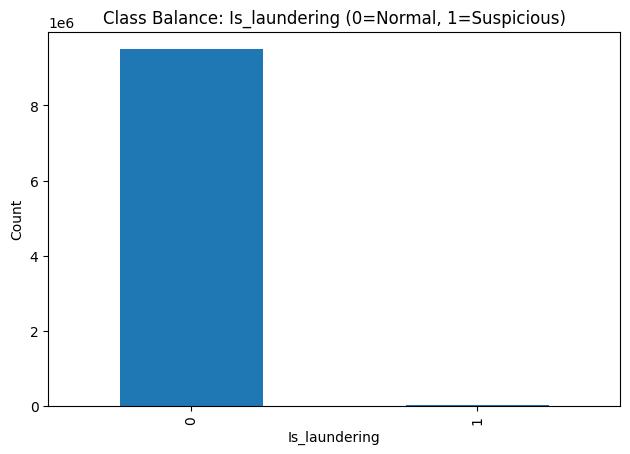

In [29]:
plt.figure()
target_counts.plot(kind="bar")
plt.title("Class Balance: Is_laundering (0=Normal, 1=Suspicious)")
plt.xlabel("Is_laundering")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [30]:
#combining the date and time columns into one column and calling it timestamp.

def safe_parse_datetime(date_col, time_col):
    # Combine with space
    ts = (df[date_col].astype(str).str.strip() + " " + df[time_col].astype(str).str.strip())

    return pd.to_datetime(ts, errors="coerce")

df["timestamp"] = safe_parse_datetime("Date", "Time")
if df["timestamp"].isna().all():

    df["timestamp"] = pd.to_datetime(df["Date"], errors="coerce", infer_datetime_format=True)

# Extract time features
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek
df["date_only"] = df["timestamp"].dt.date

In [31]:
# Count daily transactions
daily_normal = df[df["Is_laundering"] == 0].groupby("date_only").size()
daily_suspicious = df[df["Is_laundering"] == 1].groupby("date_only").size()


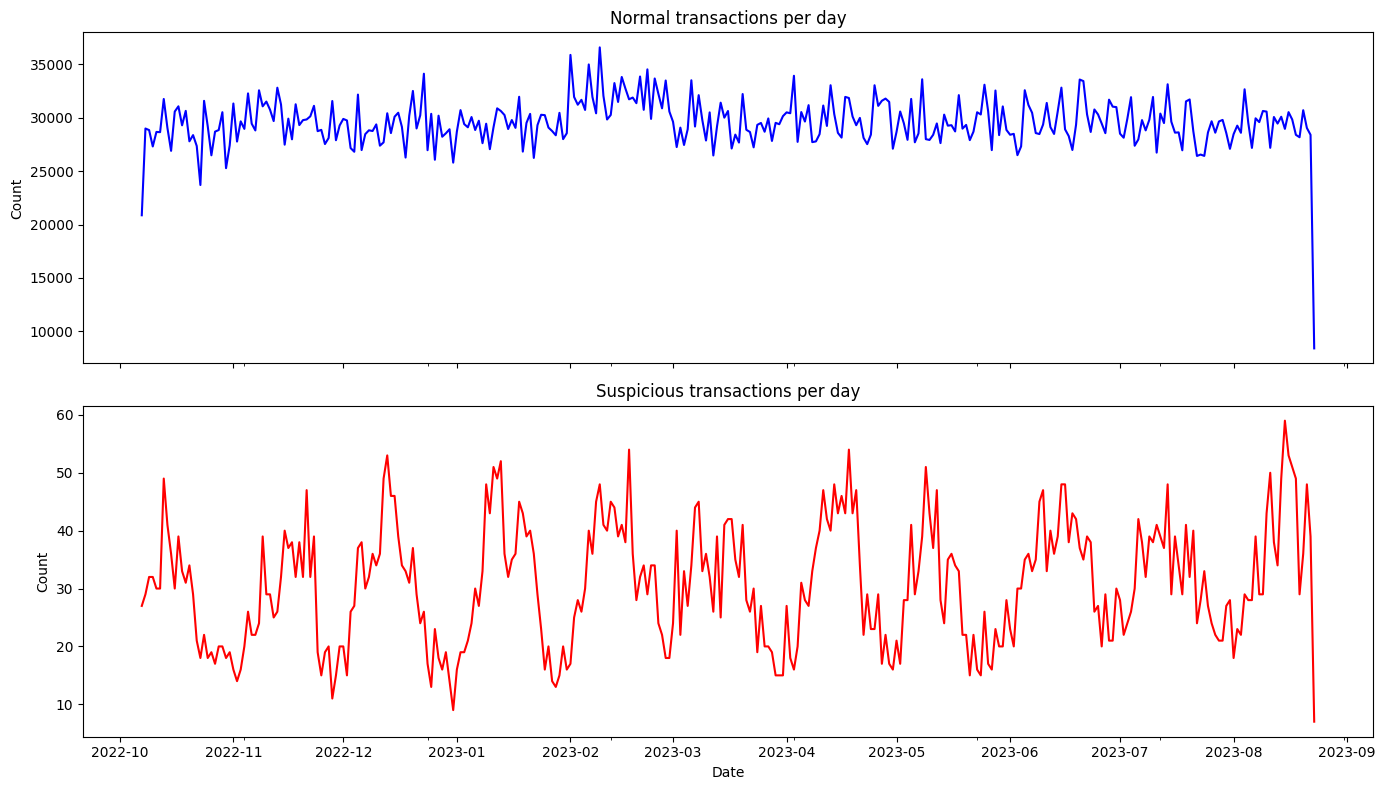

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(14,8), sharex=True)

daily_normal.plot(ax=axes[0], color="blue")
axes[0].set_title("Normal transactions per day")
axes[0].set_ylabel("Count")

daily_suspicious.plot(ax=axes[1], color="red")
axes[1].set_title("Suspicious transactions per day")
axes[1].set_ylabel("Count")

plt.xlabel("Date")
plt.tight_layout()
plt.show()


In [33]:
print(df["Amount"].describe())

count    9.504852e+06
mean     8.762968e+03
std      2.561495e+04
min      3.730000e+00
25%      2.143688e+03
50%      6.113720e+03
75%      1.045846e+04
max      1.261850e+07
Name: Amount, dtype: float64


In [34]:
df["Class"] = df["Is_laundering"].map({0: "Normal", 1: "Suspicious"})


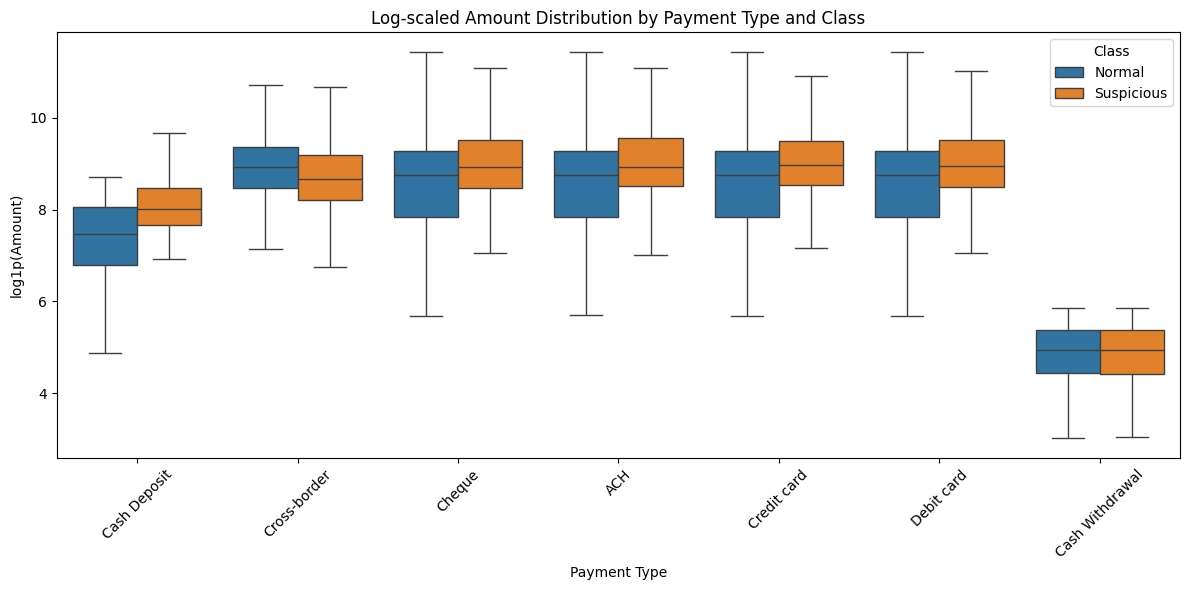

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Payment_type", y=np.log1p(df["Amount"]), hue="Class", data=df, showfliers=False)
plt.title("Log-scaled Amount Distribution by Payment Type and Class")
plt.xlabel("Payment Type")
plt.ylabel("log1p(Amount)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


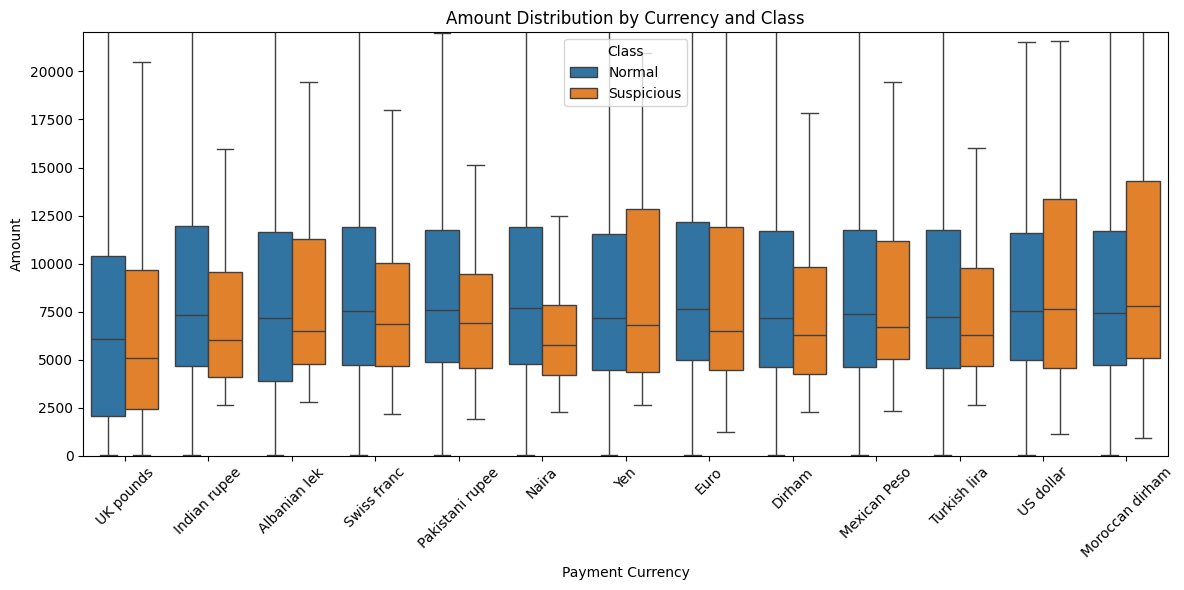

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Payment_currency", y="Amount", hue="Class", data=df, showfliers=False)
plt.title("Amount Distribution by Currency and Class")
plt.xlabel("Payment Currency")
plt.ylabel("Amount")
plt.ylim(0, df["Amount"].quantile(0.95))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


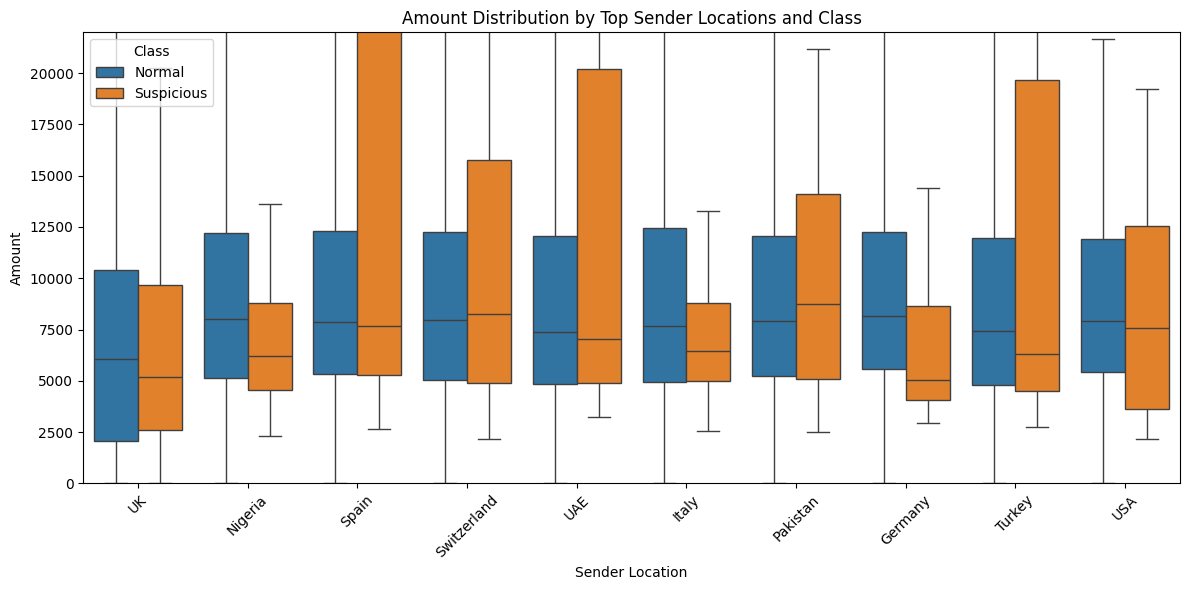

In [53]:
top_locations = df["Sender_bank_location"].value_counts().head(10).index
subset = df[df["Sender_bank_location"].isin(top_locations)]

plt.figure(figsize=(12,6))
sns.boxplot(x="Sender_bank_location", y="Amount", hue="Class", data=subset, showfliers=False)
plt.title("Amount Distribution by Top Sender Locations and Class")
plt.xlabel("Sender Location")
plt.ylabel("Amount")
plt.ylim(0, subset["Amount"].quantile(0.95))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
# Amount by class
stats_by_class = df.groupby("Is_laundering")["Amount"].describe()
print("\nAmount stats by class:\n", stats_by_class)



Amount stats by class:
                    count          mean            std    min      25%  \
Is_laundering                                                           
0              9494979.0   8729.875874   21750.032069   3.73  2142.93   
1                 9873.0  40587.666906  419181.131445  15.82  2723.79   

                   50%           75%          max  
Is_laundering                                      
0              6114.63  10458.950000    999962.19  
1              5322.79   9789.673317  12618498.40  


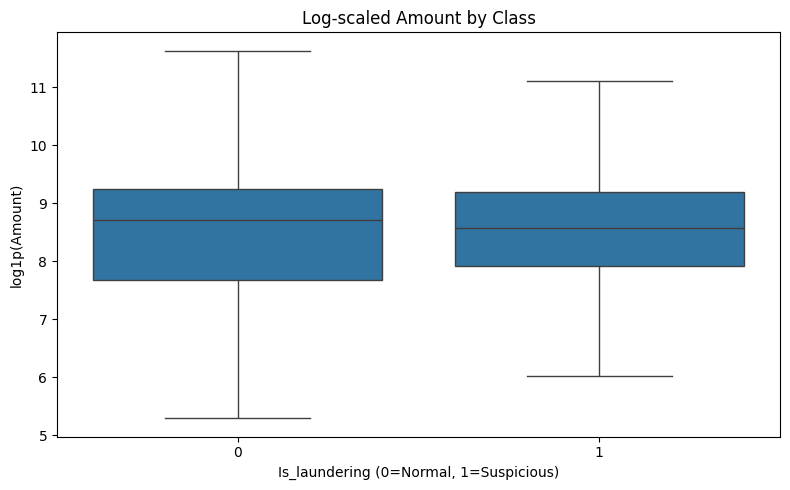

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Is_laundering", y=np.log1p(df["Amount"]), data=df, showfliers=False)
plt.title("Log-scaled Amount by Class")
plt.xlabel("Is_laundering (0=Normal, 1=Suspicious)")
plt.ylabel("log1p(Amount)")
plt.tight_layout()
plt.show()


In [57]:
thresh = df["Amount"].quantile(0.99)
outliers = df[df["Amount"] >= thresh]
print(f"\nTop 1% high-value count: {len(outliers)}; laundering rate in this slice: {outliers['Is_laundering'].mean():.4f}")



Top 1% high-value count: 95049; laundering rate in this slice: 0.0046


In [58]:
pt_counts = df["Payment_type"].value_counts(dropna=False)
print(pt_counts)

Payment_type
Credit card        2012909
Debit card         2012103
Cheque             2011419
ACH                2008807
Cross-border        933931
Cash Withdrawal     300477
Cash Deposit        225206
Name: count, dtype: int64


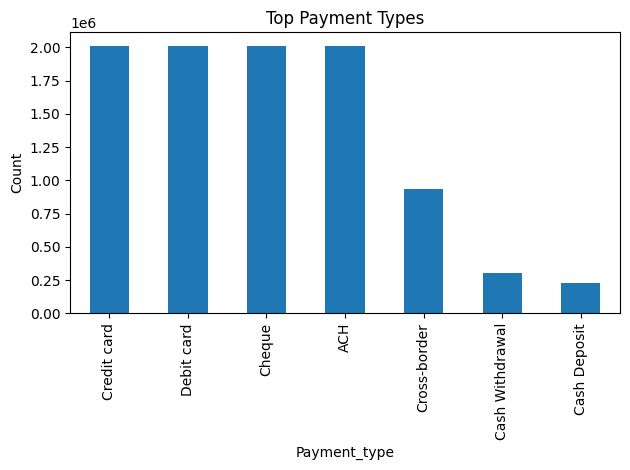

In [59]:
plt.figure()
pt_counts.head(15).plot(kind="bar")
plt.title("Top Payment Types")
plt.xlabel("Payment_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Payment_type vs class (row-normalized):
 Is_laundering      0 %   1 %
Payment_type                
ACH              99.94  0.06
Cash Deposit     99.38  0.62
Cash Withdrawal  99.56  0.44
Cheque           99.95  0.05
Credit card      99.94  0.06
Cross-border     99.72  0.28
Debit card       99.94  0.06


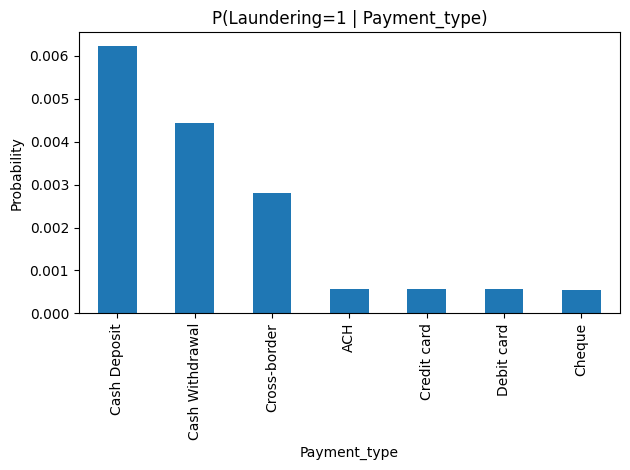

In [60]:
pt_class = pd.crosstab(df["Payment_type"], df["Is_laundering"], normalize="index").fillna(0)
print("\nPayment_type vs class (row-normalized):\n", (pt_class*100).round(2).add_suffix(" %"))
plt.figure()
(pt_class[1] if 1 in pt_class.columns else pd.Series(dtype=float)).sort_values(ascending=False).plot(kind="bar")
plt.title("P(Laundering=1 | Payment_type)")
plt.xlabel("Payment_type")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()


Median Amount by Payment_type:
 Payment_type
Cross-border       7453.030
ACH                6360.190
Credit card        6354.610
Debit card         6352.350
Cheque             6350.210
Cash Deposit       1766.895
Cash Withdrawal     139.270
Name: Amount, dtype: float64


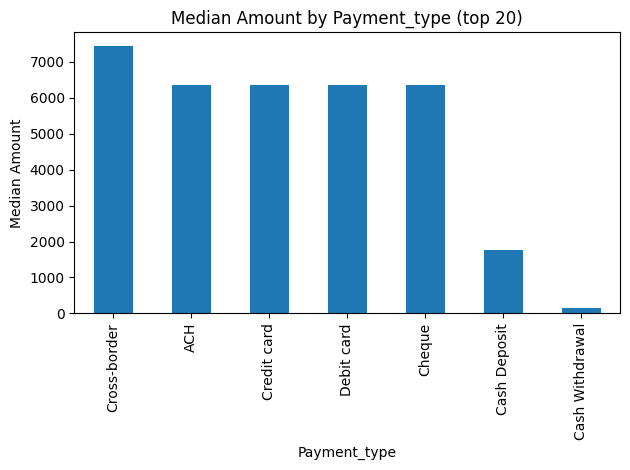

In [62]:
amt_pt = df.groupby("Payment_type")["Amount"].median().sort_values(ascending=False)
print("\nMedian Amount by Payment_type:\n", amt_pt.head(20))

plt.figure()
amt_pt.head(20).plot(kind="bar")
plt.title("Median Amount by Payment_type (top 20)")
plt.xlabel("Payment_type")
plt.ylabel("Median Amount")
plt.tight_layout()
plt.show()


In [63]:
top_senders = df["Sender_bank_location"].value_counts().head(15)
top_receivers = df["Receiver_bank_location"].value_counts().head(15)
print("\nTop sender locations:\n", top_senders)
print("\nTop receiver locations:\n", top_receivers)



Top sender locations:
 Sender_bank_location
UK             9183088
Turkey           20902
Switzerland      20503
Pakistan         20346
UAE              20081
Nigeria          20027
Spain            19391
Germany          19259
USA              19027
Italy            18895
France           18702
Japan            18468
Morocco          18437
Austria          18050
Mexico           17662
Name: count, dtype: int64

Top receiver locations:
 Receiver_bank_location
UK             8864634
Pakistan         38980
Austria          38844
Albania          38783
Japan            38729
Morocco          38704
Germany          38540
France           38512
Mexico           38385
Nigeria          38272
Netherlands      37314
Spain            37288
India            36936
USA              36850
Italy            36517
Name: count, dtype: int64


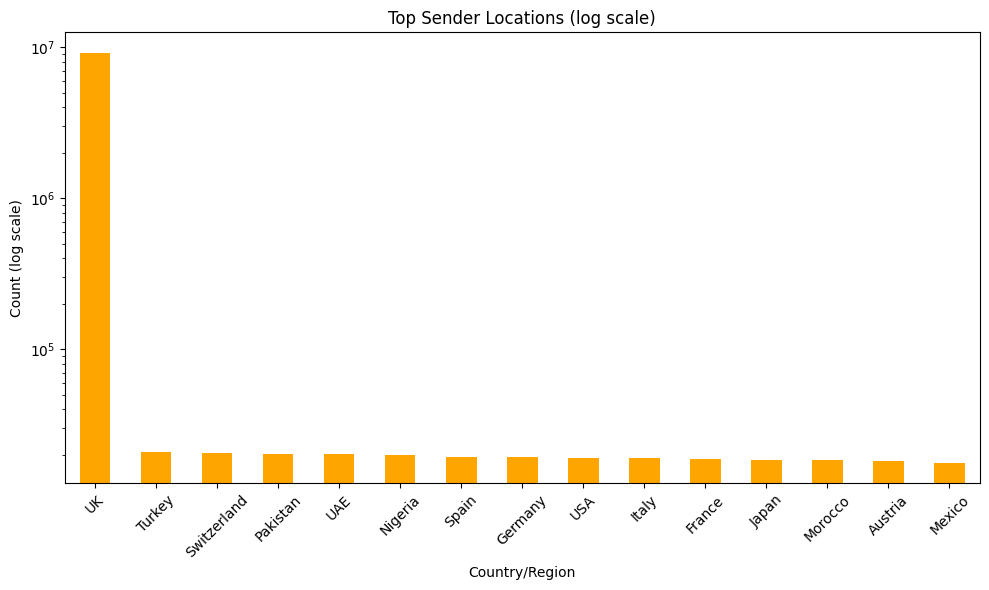

In [65]:
top_senders = df["Sender_bank_location"].value_counts().head(15)

plt.figure(figsize=(10,6))
top_senders.plot(kind="bar", color="orange")
plt.yscale("log")  # log scale
plt.title("Top Sender Locations (log scale)")
plt.xlabel("Country/Region")
plt.ylabel("Count (log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


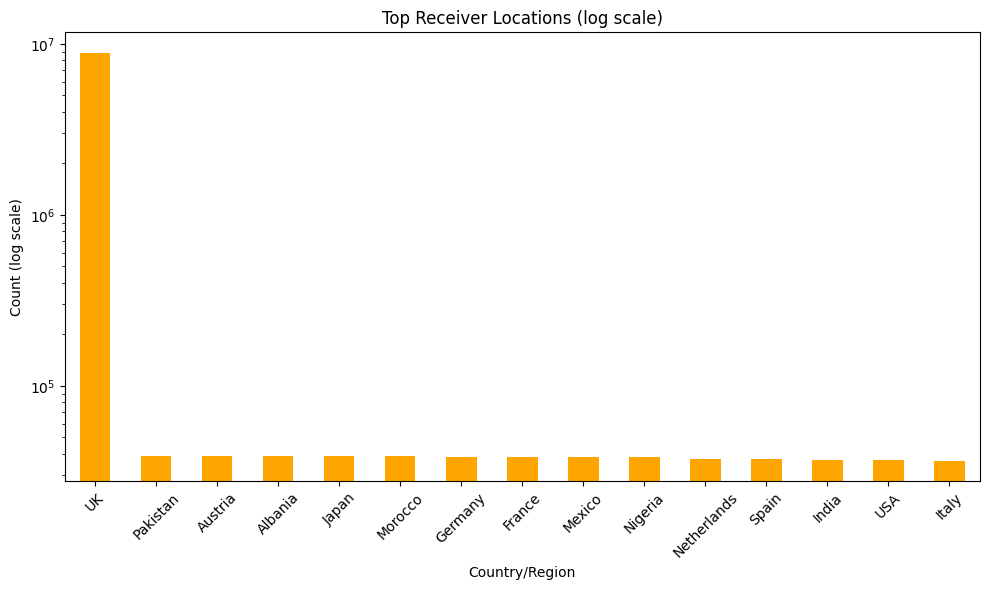

In [66]:
top_receivers = df["Receiver_bank_location"].value_counts().head(15)

plt.figure(figsize=(10,6))
top_receivers.plot(kind="bar", color="orange")
plt.yscale("log")  # log scale to reveal smaller countries
plt.title("Top Receiver Locations (log scale)")
plt.xlabel("Country/Region")
plt.ylabel("Count (log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:
cb_class = pd.crosstab(df["is_cross_border"], df["Is_laundering"], normalize="index")
print("\nCross-border vs class (row-normalized):\n", (cb_class*100).round(2).add_suffix(" %"))



Cross-border vs class (row-normalized):
 Is_laundering      0 %   1 %
is_cross_border             
0                99.92  0.08
1                99.67  0.33


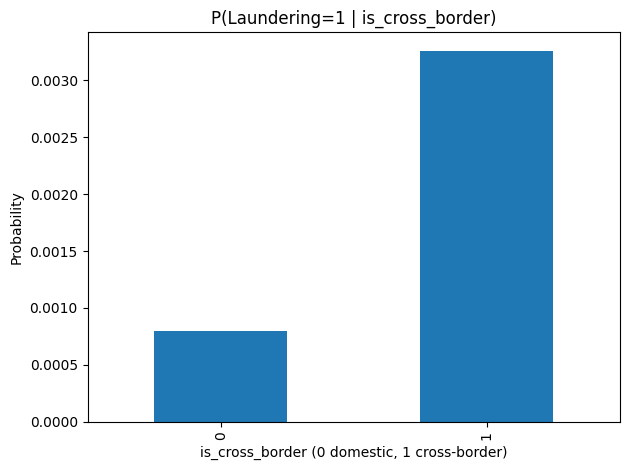

In [68]:
plt.figure()
(cb_class[1] if 1 in cb_class.columns else pd.Series(dtype=float)).plot(kind="bar")
plt.title("P(Laundering=1 | is_cross_border)")
plt.xlabel("is_cross_border (0 domestic, 1 cross-border)")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

In [69]:
routes = df.assign(route=df["Sender_bank_location"].astype(str)+" → "+df["Receiver_bank_location"].astype(str))
route_counts = routes["route"].value_counts().head(20)
print("\nTop location routes:\n", route_counts)



Top location routes:
 route
UK → UK             8569083
UK → Pakistan         37595
UK → Austria          37360
UK → Morocco          37146
UK → Japan            37130
UK → Germany          37056
UK → France           37043
UK → Mexico           36977
UK → Albania          36788
UK → Nigeria          36579
UK → Spain            35886
UK → Netherlands      35782
UK → India            35533
UK → USA              35410
UK → Italy            34856
UK → Switzerland      34402
UK → UAE              34336
UK → Turkey           34126
Turkey → UK           19265
Switzerland → UK      18761
Name: count, dtype: int64


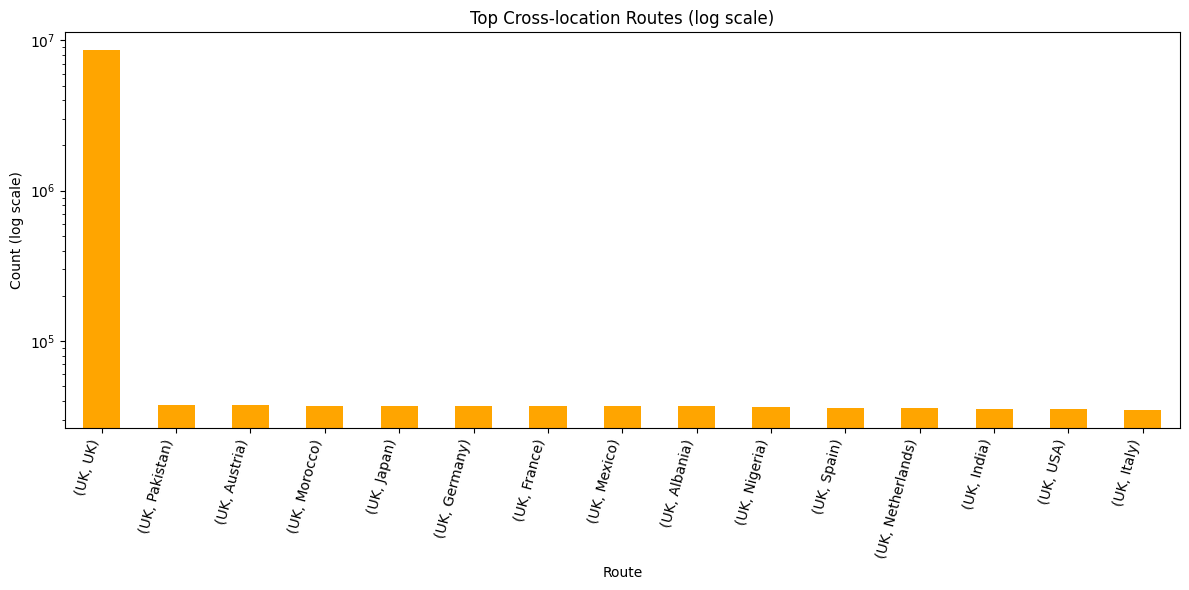

In [73]:
# Count routes as a Series
routes = df.groupby(["Sender_bank_location","Receiver_bank_location"]).size()

# Sort
top_routes = routes.sort_values(ascending=False).head(15)

# Plot with log scale
plt.figure(figsize=(12,6))
top_routes.plot(kind="bar", color="orange")
plt.yscale("log")
plt.title("Top Cross-location Routes (log scale)")
plt.xlabel("Route")
plt.ylabel("Count (log scale)")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()



In [74]:
cur_pair = df.assign(pair=df["Payment_currency"].astype(str)+" → "+df["Received_currency"].astype(str))
pair_counts = cur_pair["pair"].value_counts().head(20)
print("\nTop currency pairs:\n", pair_counts)



Top currency pairs:
 pair
UK pounds → UK pounds          8414112
UK pounds → Euro                220504
Euro → UK pounds                106608
UK pounds → Pakistani rupee      43895
UK pounds → Yen                  43517
UK pounds → Moroccan dirham      43461
UK pounds → Mexican Peso         43174
UK pounds → Albanian lek         43040
UK pounds → Naira                42696
UK pounds → Indian rupee         41719
UK pounds → US dollar            41571
UK pounds → Swiss franc          40581
UK pounds → Dirham               40581
UK pounds → Turkish lira         40442
Turkish lira → UK pounds         25548
Swiss franc → UK pounds          25002
Dirham → UK pounds               24808
Pakistani rupee → UK pounds      24774
Naira → UK pounds                24729
US dollar → UK pounds            23618
Name: count, dtype: int64


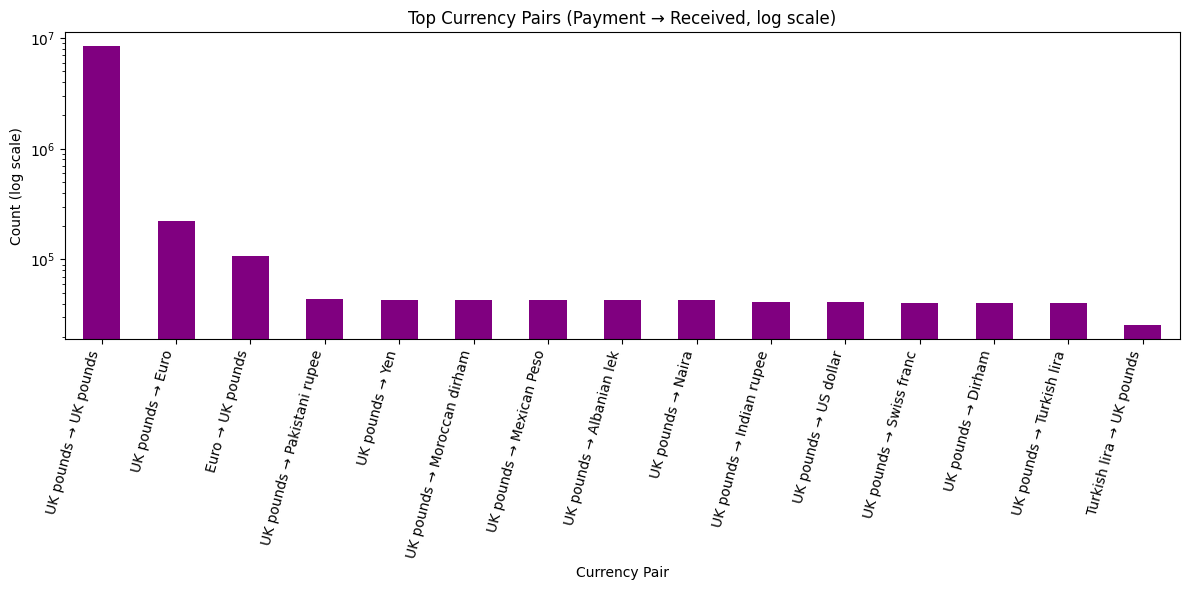

In [76]:
# Sort and keep top 15 currency pairs
top_pairs = pair_counts.sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
top_pairs.plot(kind="bar", color="purple")
plt.yscale("log")  # log scale makes small values visible
plt.title("Top Currency Pairs (Payment → Received, log scale)")
plt.xlabel("Currency Pair")
plt.ylabel("Count (log scale)")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


In [77]:
cur_class = pd.crosstab(df["is_currency_mismatch"], df["Is_laundering"], normalize="index")
print("\nCurrency mismatch vs class (row-normalized):\n", (cur_class*100).round(2).add_suffix(" %"))



Currency mismatch vs class (row-normalized):
 Is_laundering           0 %   1 %
is_currency_mismatch             
0                     99.93  0.07
1                     99.66  0.34


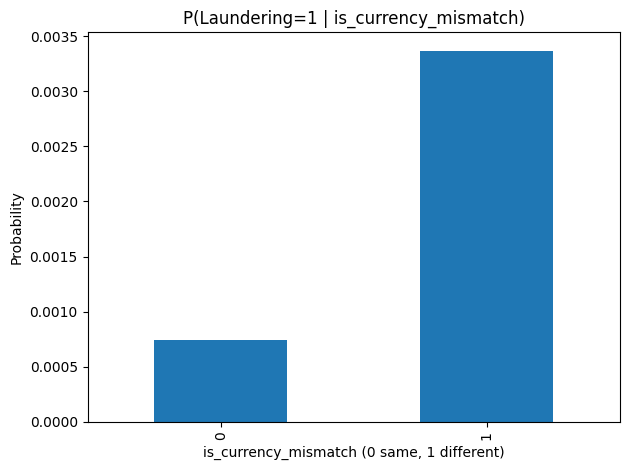

In [78]:
plt.figure()
(cur_class[1] if 1 in cur_class.columns else pd.Series(dtype=float)).plot(kind="bar")
plt.title("P(Laundering=1 | is_currency_mismatch)")
plt.xlabel("is_currency_mismatch (0 same, 1 different)")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

In [79]:
tx_per_sender = df.groupby("Sender_account").size().rename("tx_count_sender").sort_values(ascending=False)
tx_per_receiver = df.groupby("Receiver_account").size().rename("tx_count_receiver").sort_values(ascending=False)

print("\nTop senders by #transactions:\n", tx_per_sender.head(10))
print("\nTop receivers by #transactions:\n", tx_per_receiver.head(10))



Top senders by #transactions:
 Sender_account
4808614002    754
2938210715    753
5579295130    751
2357599526    749
3831533348    749
798082205     743
9810335545    742
8600542721    738
8913863501    736
6408343900    735
Name: tx_count_sender, dtype: int64

Top receivers by #transactions:
 Receiver_account
8600542721    751
2938210715    745
5460360634    740
5579295130    739
4808614002    737
4724445469    736
3747015869    734
9544431251    734
4924631375    734
9824280342    732
Name: tx_count_receiver, dtype: int64


In [80]:
fan_out = df.groupby("Sender_account")["Receiver_account"].nunique().rename("unique_receivers")
fan_in  = df.groupby("Receiver_account")["Sender_account"].nunique().rename("unique_senders")

print("\nTop fan-out (unique receivers):\n", fan_out.sort_values(ascending=False).head(10))
print("\nTop fan-in (unique senders):\n", fan_in.sort_values(ascending=False).head(10))



Top fan-out (unique receivers):
 Sender_account
5791275590    60
3656038300    59
8180422959    59
3566232777    59
4623242164    59
8035399972    59
2822872306    59
9719585962    59
7470300488    59
1542389688    59
Name: unique_receivers, dtype: int64

Top fan-in (unique senders):
 Receiver_account
3458503586    50
6844529387    49
1652013105    48
9101431692    48
1665774528    46
3166538889    46
7772352930    46
8227126673    45
6123421761    45
3790148325    42
Name: unique_senders, dtype: int64


In [81]:
df = df.merge(fan_out, how="left", left_on="Sender_account", right_index=True)
df = df.merge(fan_in,  how="left", left_on="Receiver_account", right_index=True)


In [82]:
def bucketize(s, bins):
    return pd.cut(s.fillna(0), bins=bins, include_lowest=True)

df["fan_out_bucket"] = bucketize(df["unique_receivers"], bins=[-1,0,1,3,5,10,1000])
df["fan_in_bucket"]  = bucketize(df["unique_senders"],  bins=[-1,0,1,3,5,10,1000])

fan_out_rate = df.groupby("fan_out_bucket")["Is_laundering"].mean()
fan_in_rate  = df.groupby("fan_in_bucket")["Is_laundering"].mean()

print("\nP(Laundering=1) by fan-out bucket:\n", fan_out_rate)
print("\nP(Laundering=1) by fan-in bucket:\n", fan_in_rate)


/tmp/ipython-input-655608424.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fan_out_rate = df.groupby("fan_out_bucket")["Is_laundering"].mean()
/tmp/ipython-input-655608424.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fan_in_rate  = df.groupby("fan_in_bucket")["Is_laundering"].mean()



P(Laundering=1) by fan-out bucket:
 fan_out_bucket
(-1.001, 0.0]          NaN
(0.0, 1.0]        0.000000
(1.0, 3.0]        0.041276
(3.0, 5.0]        0.089823
(5.0, 10.0]       0.011438
(10.0, 1000.0]    0.000932
Name: Is_laundering, dtype: float64

P(Laundering=1) by fan-in bucket:
 fan_in_bucket
(-1.001, 0.0]          NaN
(0.0, 1.0]        0.000142
(1.0, 3.0]        0.051376
(3.0, 5.0]        0.020465
(5.0, 10.0]       0.006193
(10.0, 1000.0]    0.001600
Name: Is_laundering, dtype: float64


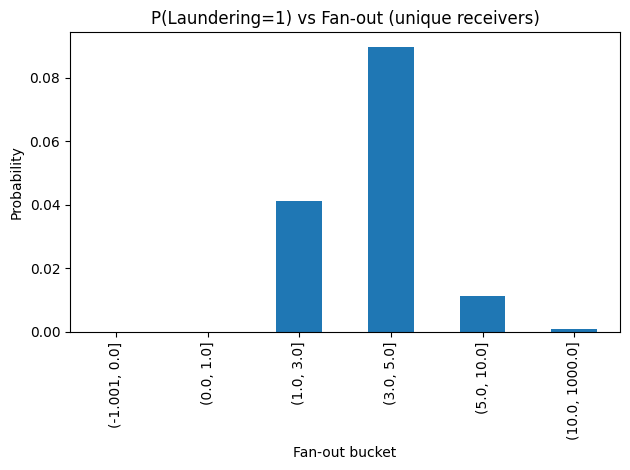

In [83]:
plt.figure()
fan_out_rate.plot(kind="bar")
plt.title("P(Laundering=1) vs Fan-out (unique receivers)")
plt.xlabel("Fan-out bucket")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

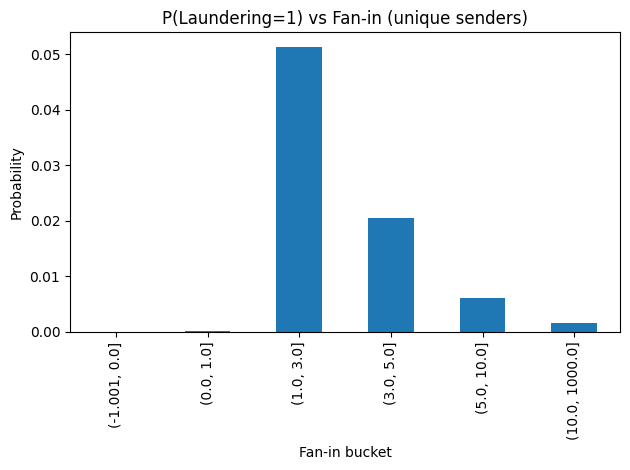

In [84]:
plt.figure()
fan_in_rate.plot(kind="bar")
plt.title("P(Laundering=1) vs Fan-in (unique senders)")
plt.xlabel("Fan-in bucket")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

In [85]:
hourly = pd.crosstab(df["hour"], df["Is_laundering"], normalize="index")
dow    = pd.crosstab(df["dayofweek"], df["Is_laundering"], normalize="index")

print("\nP(Laundering=1) by hour:\n", (hourly[1] if 1 in hourly.columns else pd.Series(dtype=float)))
print("\nP(Laundering=1) by dayofweek (Mon=0):\n", (dow[1] if 1 in dow.columns else pd.Series(dtype=float)))



P(Laundering=1) by hour:
 hour
0     0.001119
1     0.001000
2     0.001135
3     0.001138
4     0.001036
5     0.001146
6     0.001202
7     0.001558
8     0.001173
9     0.000978
10    0.001091
11    0.001109
12    0.001071
13    0.001111
14    0.001048
15    0.000956
16    0.001030
17    0.001073
18    0.000951
19    0.000958
20    0.000880
21    0.000995
22    0.000964
23    0.000961
Name: 1, dtype: float64

P(Laundering=1) by dayofweek (Mon=0):
 dayofweek
0    0.001060
1    0.001040
2    0.001049
3    0.001077
4    0.001083
5    0.000980
6    0.000980
Name: 1, dtype: float64


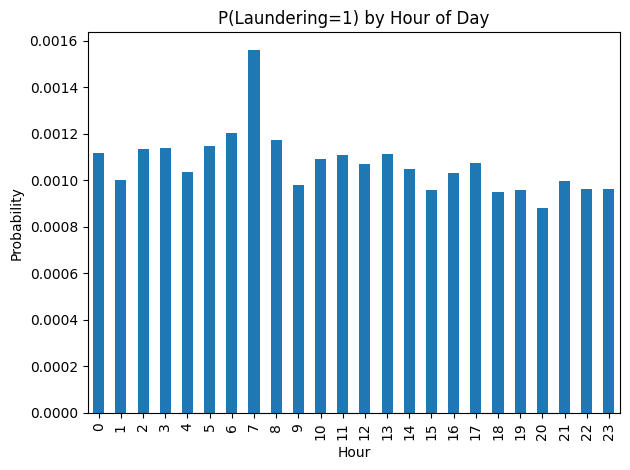

In [86]:
if 1 in hourly.columns:
    plt.figure()
    hourly[1].plot(kind="bar")
    plt.title("P(Laundering=1) by Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel("Probability")
    plt.tight_layout()
    plt.show()

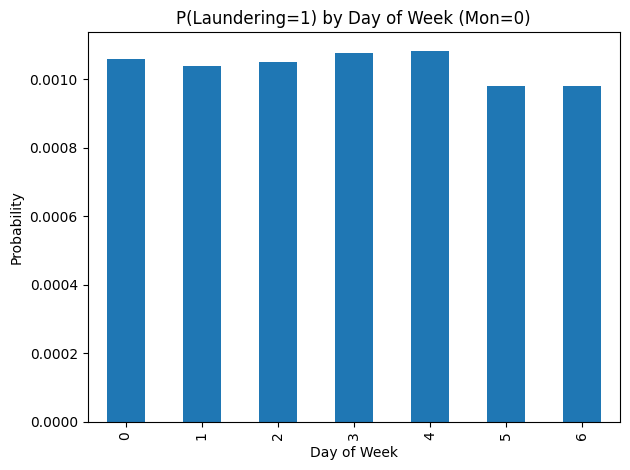

In [87]:
if 1 in dow.columns:
    plt.figure()
    dow[1].plot(kind="bar")
    plt.title("P(Laundering=1) by Day of Week (Mon=0)")
    plt.xlabel("Day of Week")
    plt.ylabel("Probability")
    plt.tight_layout()
    plt.show()

In [88]:
work = df.copy()

# Encode key categoricals to codes for a quick correlation glimpse
cat_cols = ["Payment_type","Payment_currency","Received_currency",
            "Sender_bank_location","Receiver_bank_location","Laundering_type"]
for c in cat_cols:
    if c in work.columns:
        work[c] = work[c].astype("category").cat.codes  # -1 for NaN

num_cols = []
for c in ["Amount","hour","dayofweek","is_cross_border","is_currency_mismatch",
          "unique_receivers","unique_senders"] + cat_cols:
    if c in work.columns and pd.api.types.is_numeric_dtype(work[c]):
        num_cols.append(c)

corr = work[num_cols + ["Is_laundering"]].corr()["Is_laundering"].sort_values(ascending=False)
print("\nCorrelation to Is_laundering:\n", corr)


Correlation to Is_laundering:
 Is_laundering             1.000000
Amount                    0.040063
is_currency_mismatch      0.025967
unique_senders            0.025065
is_cross_border           0.022757
dayofweek                -0.000712
Payment_type             -0.001736
hour                     -0.001958
Sender_bank_location     -0.004820
Payment_currency         -0.008157
unique_receivers         -0.017773
Receiver_bank_location   -0.020932
Received_currency        -0.023477
Laundering_type          -0.029075
Name: Is_laundering, dtype: float64


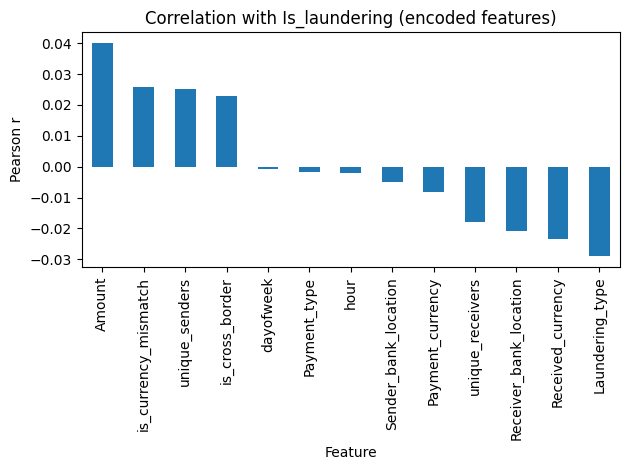

In [89]:
plt.figure()
corr.drop("Is_laundering", errors="ignore").plot(kind="bar")
plt.title("Correlation with Is_laundering (encoded features)")
plt.xlabel("Feature")
plt.ylabel("Pearson r")
plt.tight_layout()
plt.show()


--- Laundering_type counts ---
 Laundering_type
Normal_Small_Fan_Out      3477717
Normal_Fan_Out            2302220
Normal_Fan_In             2104285
Normal_Group               528351
Normal_Cash_Withdrawal     305031
Normal_Cash_Deposits       223801
Normal_Periodical          210526
Normal_Plus_Mutual         155041
Normal_Mutual              125335
Normal_Foward               42031
Normal_single_large         20641
Structuring                  1870
Cash_Withdrawal              1334
Deposit-Send                  945
Smurfing                      932
Layered_Fan_In                656
Layered_Fan_Out               529
Stacked Bipartite             506
Behavioural_Change_1          394
Bipartite                     383
Cycle                         382
Fan_In                        364
Gather-Scatter                354
Behavioural_Change_2          345
Scatter-Gather                338
Single_large                  250
Fan_Out                       237
Over-Invoicing                 54

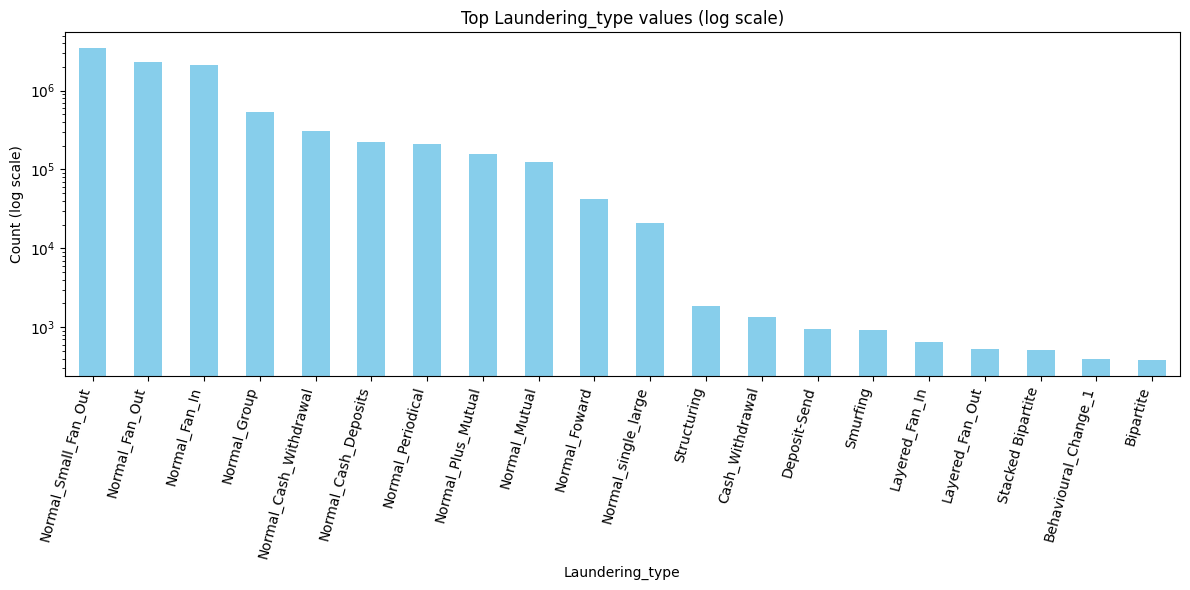


Median Amount by Laundering_type:
 Laundering_type
Over-Invoicing         4.219461e+06
Normal_single_large    1.840421e+05
Single_large           1.835654e+05
Normal_Mutual          2.739447e+04
Cycle                  2.149489e+04
Normal_Plus_Mutual     1.368810e+04
Layered_Fan_In         1.072606e+04
Fan_Out                9.018040e+03
Normal_Fan_In          9.007060e+03
Bipartite              8.900820e+03
Fan_In                 8.552190e+03
Gather-Scatter         8.510195e+03
Normal_Fan_Out         8.416970e+03
Stacked Bipartite      7.882615e+03
Scatter-Gather         7.854245e+03
Layered_Fan_Out        6.729767e+03
Deposit-Send           6.331860e+03
Normal_Foward          6.165640e+03
Structuring            4.800350e+03
Normal_Periodical      4.467970e+03
Name: Amount, dtype: float64


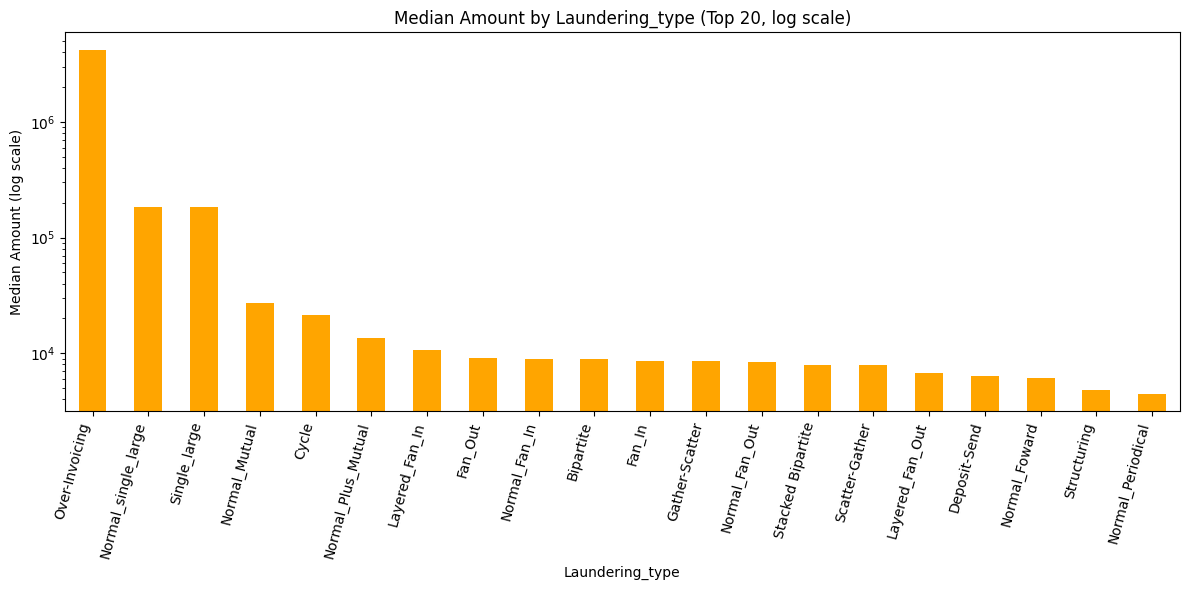

In [95]:
if "Laundering_type" in df.columns:
    lt_counts = df["Laundering_type"].value_counts(dropna=False)
    print("\n--- Laundering_type counts ---\n", lt_counts.head(30))

    # Counts plot with log scale
    plt.figure(figsize=(12,6))
    lt_counts.head(20).plot(kind="bar", color="skyblue")
    plt.yscale("log")  # log scale
    plt.title("Top Laundering_type values (log scale)")
    plt.xlabel("Laundering_type")
    plt.ylabel("Count (log scale)")
    plt.xticks(rotation=75, ha="right")
    plt.tight_layout()
    plt.show()

    # Median amount by laundering type
    lt_amt = df.groupby("Laundering_type")["Amount"].median().sort_values(ascending=False)
    print("\nMedian Amount by Laundering_type:\n", lt_amt.head(20))

    # Median amounts plot with log scale
    plt.figure(figsize=(12,6))
    lt_amt.head(20).plot(kind="bar", color="orange")
    plt.yscale("log")  # log scale
    plt.title("Median Amount by Laundering_type (Top 20, log scale)")
    plt.xlabel("Laundering_type")
    plt.ylabel("Median Amount (log scale)")
    plt.xticks(rotation=75, ha="right")
    plt.tight_layout()
    plt.show()
